# Convolutional Neural Network

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing import image

In [34]:
tf.__version__

'2.12.0'

## Part 1 - Data Processing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, shear_range = 0.2,
                                    zoom_range = 0.2, horizontal_flip = True, 
                                    validation_split = 0.1)
    
training_set = train_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Training/',
                                                target_size = (64, 64), 
                                                 batch_size = 32,
                                                shuffle = True)

Found 2870 images belonging to 4 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.1)
test_set = test_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Testing/',
                                            target_size = (64, 64), 
                                            batch_size = 32, shuffle = False)

Found 394 images belonging to 4 classes.


In [6]:
images, labels = next(training_set)
images.shape

(32, 64, 64, 3)

### Lets see an image from training

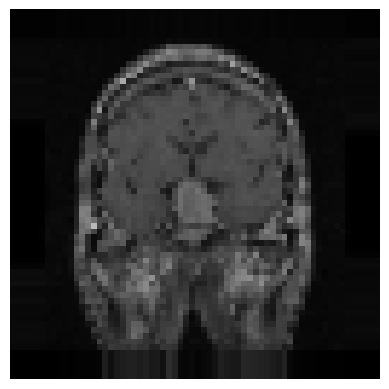

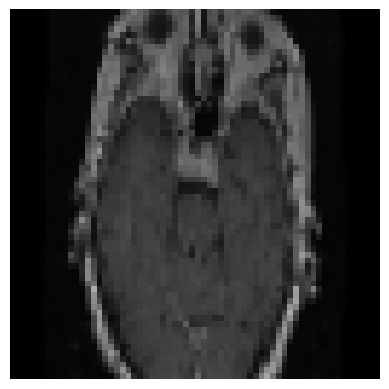

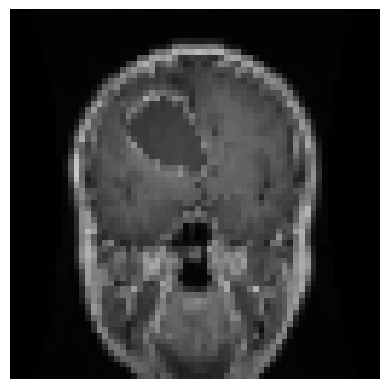

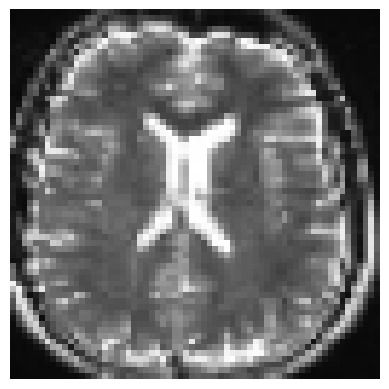

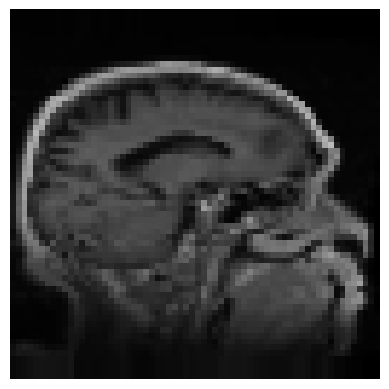

In [7]:
images, labels = next(training_set) 
for i in range(5):
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()

## Part 2 - Building the CNN

### Initialising the CNN

In [8]:
model = Sequential()

### Step 1 - Convolution nad MaxPooling

In [9]:
model.add(Conv2D(filters = 32, kernel_size = 5, activation = 'relu', input_shape = [64, 64, 3]))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

### Step 2 - Flattening and Full Connection

In [10]:
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 8, verbose=1, batch_size=32)

Epoch 1/8
90/90 [==============================] - 29s 300ms/step - loss: 1.3582 - accuracy: 0.3157 - val_loss: 1.4511 - val_accuracy: 0.2563
Epoch 2/8
90/90 [==============================] - 14s 149ms/step - loss: 1.1890 - accuracy: 0.4700 - val_loss: 1.8624 - val_accuracy: 0.2563
Epoch 3/8
90/90 [==============================] - 14s 151ms/step - loss: 1.0122 - accuracy: 0.5735 - val_loss: 1.6273 - val_accuracy: 0.3426
Epoch 4/8
90/90 [==============================] - 13s 146ms/step - loss: 0.8489 - accuracy: 0.6415 - val_loss: 1.7138 - val_accuracy: 0.3350
Epoch 5/8
90/90 [==============================] - 13s 148ms/step - loss: 0.7337 - accuracy: 0.6843 - val_loss: 1.6714 - val_accuracy: 0.4594
Epoch 6/8
90/90 [==============================] - 14s 152ms/step - loss: 0.7069 - accuracy: 0.7066 - val_loss: 1.5010 - val_accuracy: 0.4213
Epoch 7/8
90/90 [==============================] - 13s 148ms/step - loss: 0.6614 - accuracy: 0.7233 - val_loss: 1.7037 - val_accuracy: 0.4492
Epoch 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

### Lets see the evaluate score nad loss function graph

In [14]:
model.evaluate(test_set)

13/13 [==============================] - 1s 85ms/step - loss: 2.2499 - accuracy: 0.4543


[2.2499403953552246, 0.4543147087097168]

<Axes: >

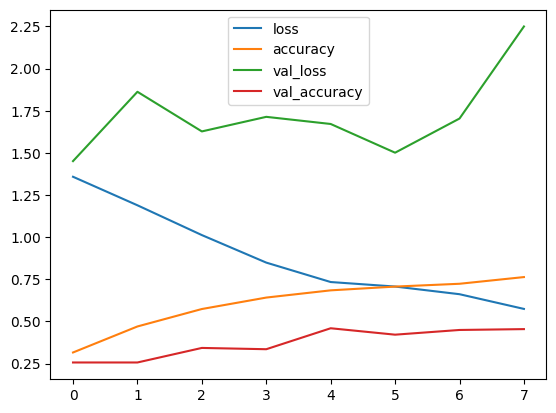

In [15]:
loss = pd.DataFrame(history.history) 
loss.plot()

In [16]:
loss

,loss,accuracy,val_loss,val_accuracy
0,1.358241,0.315679,1.451052,0.256345
1,1.188988,0.470035,1.862403,0.256345
2,1.012228,0.573519,1.627303,0.342640
3,0.848894,0.641463,1.713802,0.335025
4,0.733668,0.684321,1.671436,0.459391
5,0.706886,0.706620,1.501046,0.421320
6,0.661429,0.723345,1.703741,0.449239
7,0.574169,0.763066,2.249940,0.454315


### Making Single Prediction

In [17]:
test_set.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

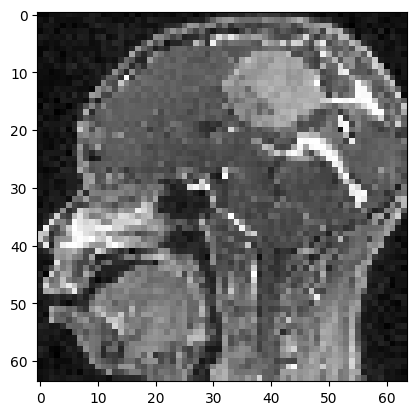

In [18]:
test_image = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(48).jpg',
                           target_size = (64, 64))
plt.imshow(test_image)

In [19]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = np.argmax(result)
if result == 0:
    print('glioma_tumor')
elif result == 1:
    print('meningioma_tumor')
elif result == 2:
    print('no_tumor')
else:
    print('pituitary_tumor')


1/1 [==============================] - 0s 125ms/step
no_tumor


### Making Multiple Predictions

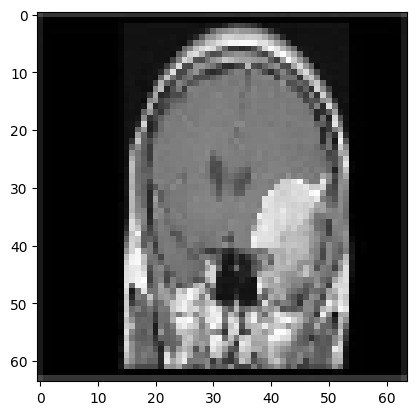

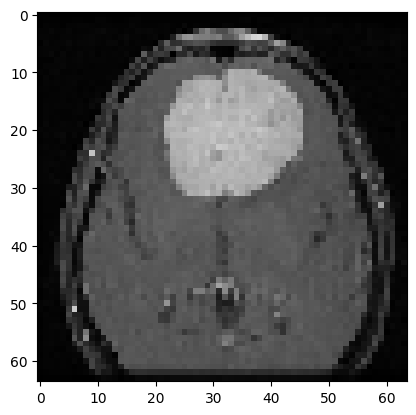

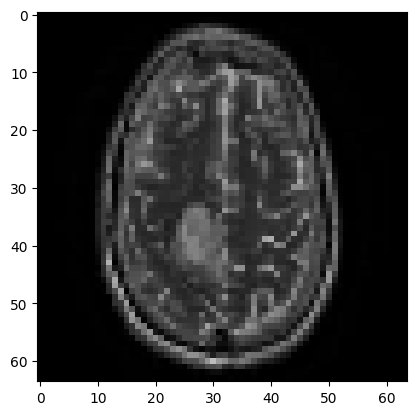

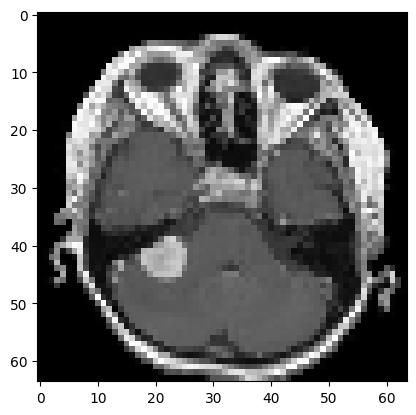

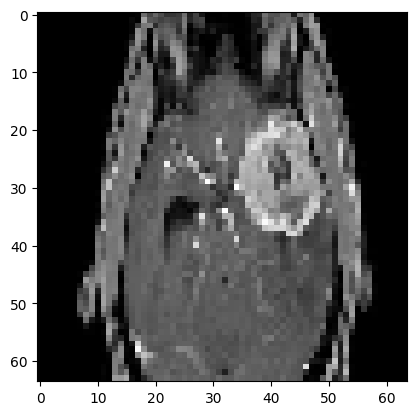

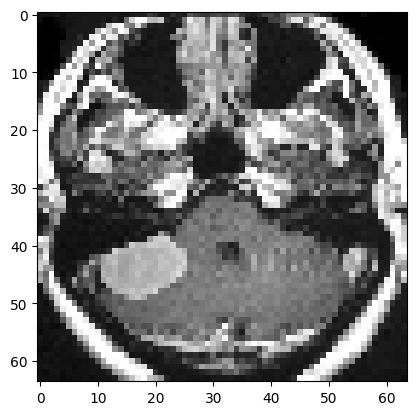

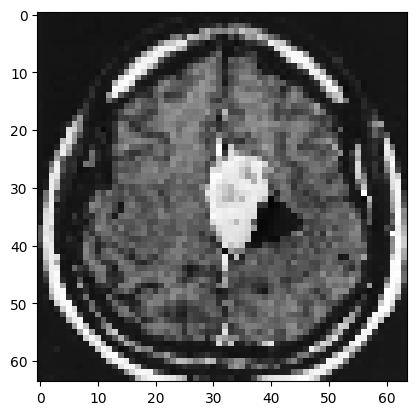

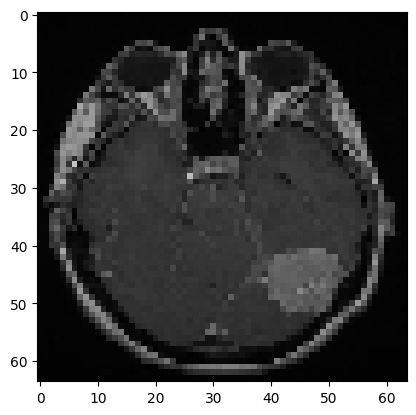

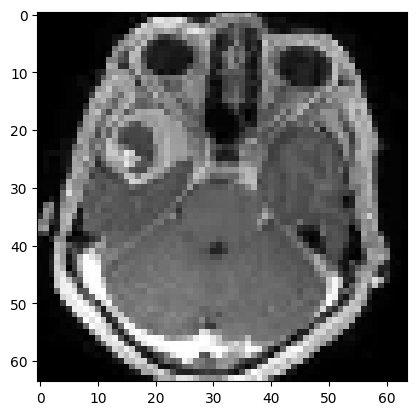

In [23]:
for i in range(1, 10):
    test_image = image.load_img(f'/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image({i}).jpg',
                               target_size = (64, 64))
    plt.imshow(test_image)
    plt.show()

In [45]:
for i in range(10, 15):
    test_image = image.load_img(f'/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image({i}).jpg',
                               target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    result = np.argmax(result)
    
    sinif_etiketleri = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    
    if result >= 0 and result < len(sinif_etiketleri):
        tahmin_edilen_sinif = sinif_etiketleri[result]
        print(f"Resim {i} için tahmin edilen sınıf: {tahmin_edilen_sinif}")
    else:
        print(f"Resim {i} için bilinmeyen sınıf")
    


1/1 [==============================] - 0s 20ms/step
Resim 10 için tahmin edilen sınıf: no_tumor
1/1 [==============================] - 0s 19ms/step
Resim 11 için tahmin edilen sınıf: no_tumor
1/1 [==============================] - 0s 19ms/step
Resim 12 için tahmin edilen sınıf: no_tumor
1/1 [==============================] - 0s 22ms/step
Resim 13 için tahmin edilen sınıf: no_tumor
1/1 [==============================] - 0s 20ms/step
Resim 14 için tahmin edilen sınıf: no_tumor


In [36]:
for i in range(50, 80):
    test_image = image.load_img(f'/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image({i}).jpg',
                               target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    result = np.argmax(result)
    
    if result == 0:
        print(f'Resim {i} için sonuc : glioma_tumor')
    elif result == 1:
        print(f'Resim {i} için sonuc : meningioma_tumor')
    elif result == 2:
        print(f'Resim {i} için sonuc : no_tumor')
    else:
        print(f'Resim {i} için sonuc : pituitary_tumor')

1/1 [==============================] - 0s 21ms/step
Resim 50 için sonuc : no_tumor
1/1 [==============================] - 0s 19ms/step
Resim 51 için sonuc : meningioma_tumor
1/1 [==============================] - 0s 19ms/step
Resim 52 için sonuc : no_tumor
1/1 [==============================] - 0s 19ms/step
Resim 53 için sonuc : no_tumor
1/1 [==============================] - 0s 20ms/step
Resim 54 için sonuc : no_tumor
1/1 [==============================] - 0s 18ms/step
Resim 55 için sonuc : no_tumor
1/1 [==============================] - 0s 20ms/step
Resim 56 için sonuc : no_tumor
1/1 [==============================] - 0s 20ms/step
Resim 57 için sonuc : meningioma_tumor
1/1 [==============================] - 0s 20ms/step
Resim 58 için sonuc : no_tumor
1/1 [==============================] - 0s 18ms/step
Resim 59 için sonuc : no_tumor
1/1 [==============================] - 0s 17ms/step
Resim 60 için sonuc : no_tumor
1/1 [==============================] - 0s 20ms/step
Resim 61 için sonuc

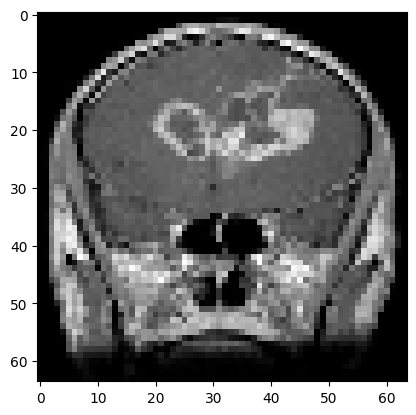

In [59]:
plt.imshow(test_set[i][0][0])

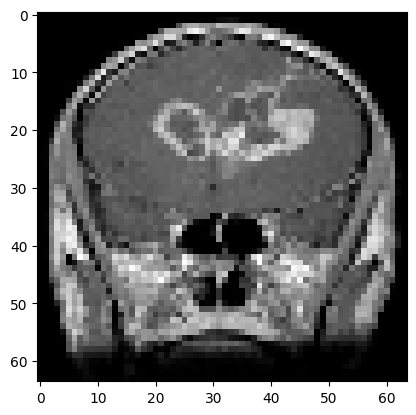

In [70]:
plt.imshow(test_set[0][0][0])

1/1 [==============================] - 0s 44ms/step


/tmp/ipykernel_32/44822573.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(f'Actual: {labels_name[true_label.all()]}', color='r')


1/1 [==============================] - 0s 47ms/step


ValueError: num must be an integer with 1 <= num <= 40, not 41

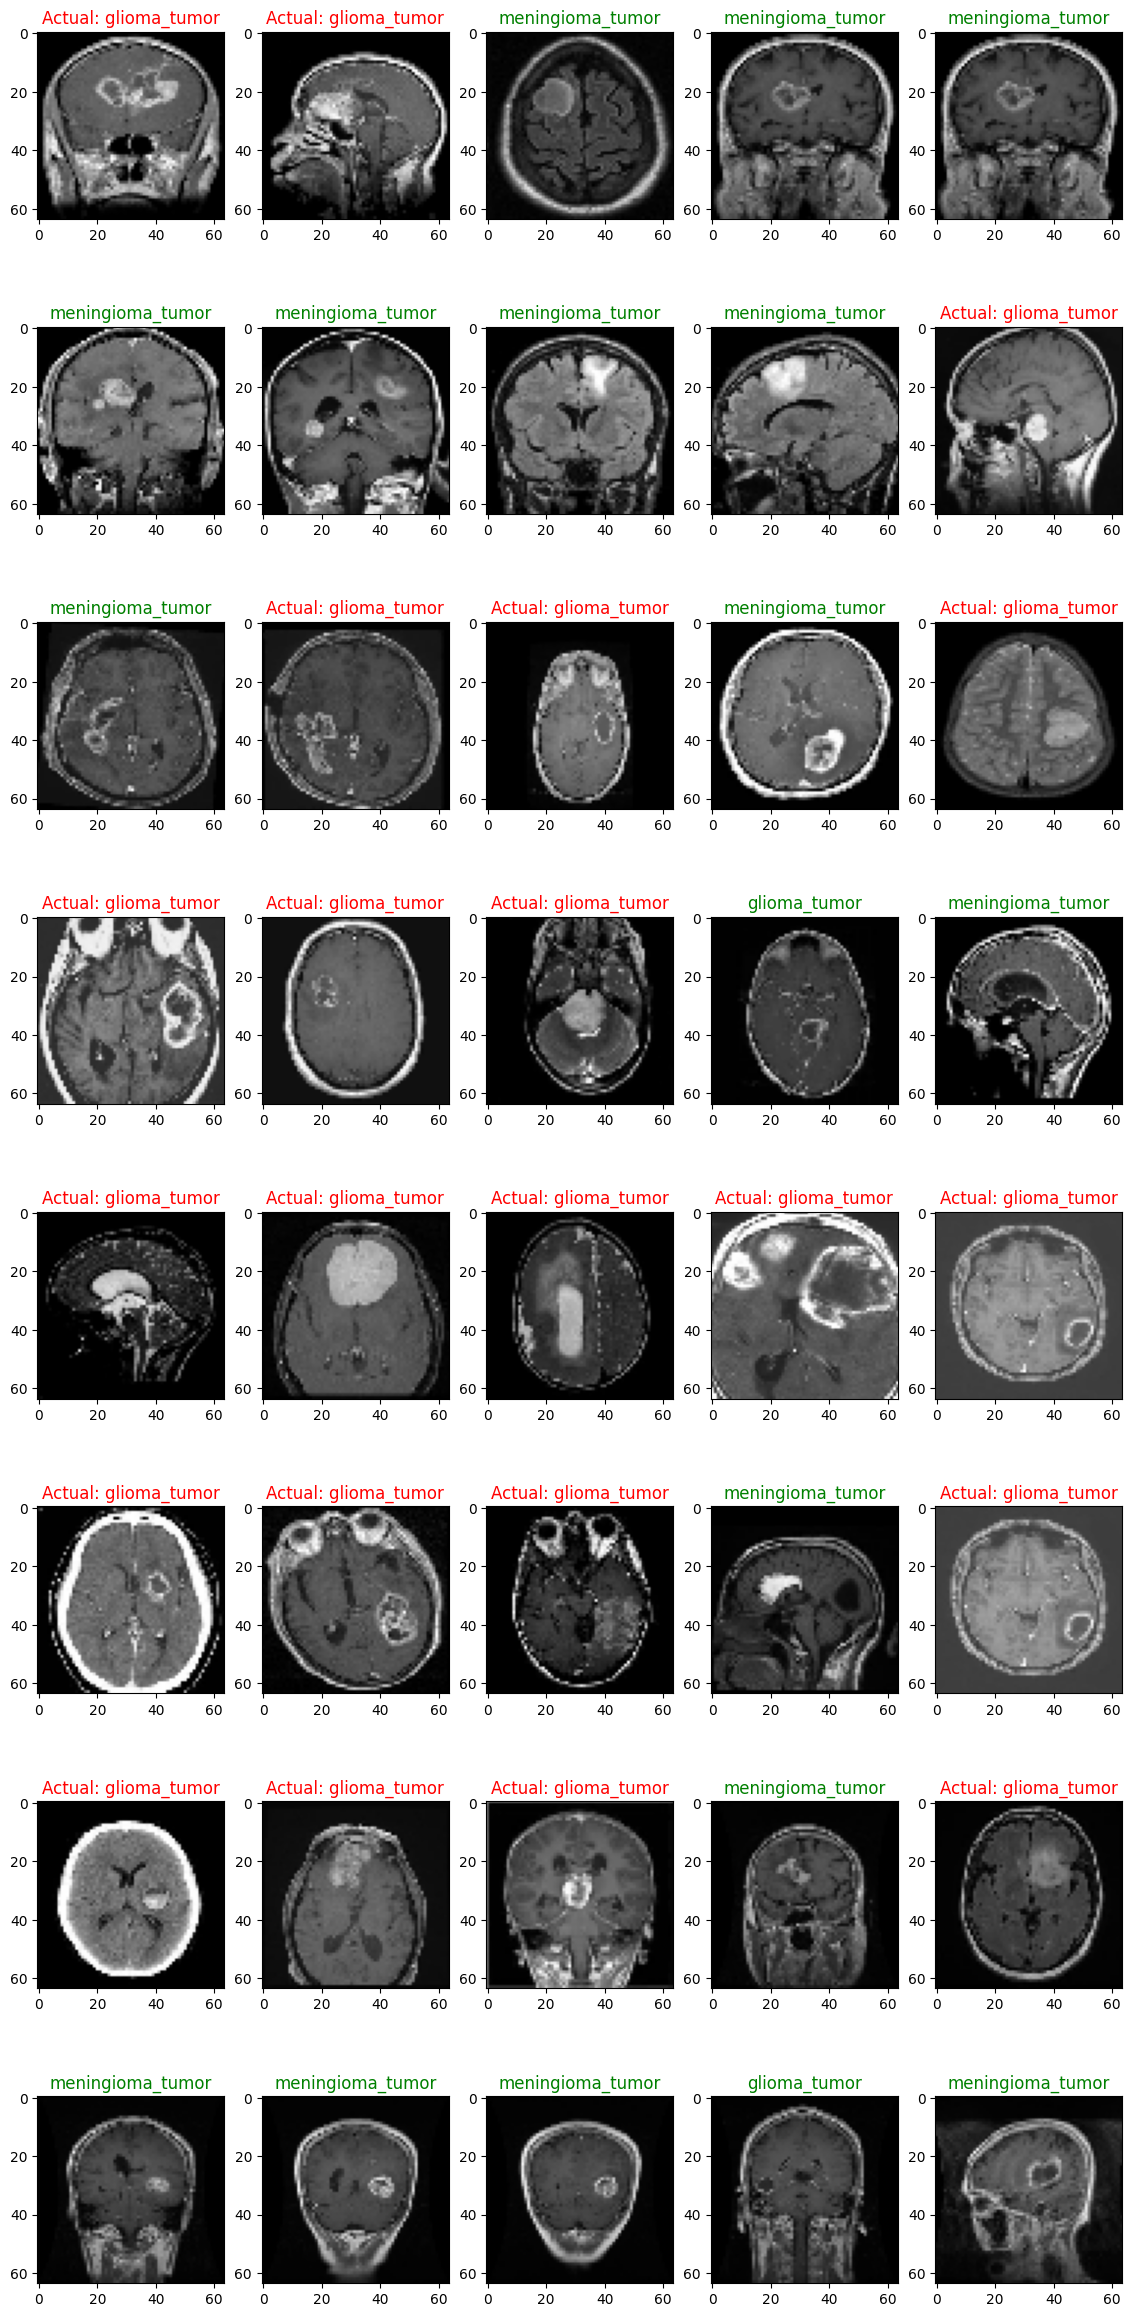

In [66]:
labels_name = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
plt.figure(figsize=(14, 30))
for i in range(4):
    pred = model.predict(test_set[i][0])
    for j in range(len(pred)):
        plt.subplot(8, 5, (10 * i) + j + 1)
        plt.imshow(test_set[i][0][j])
                   
        # Choose the class with the highest predicted probability
        labels_pred = np.argmax(pred[j])
        true_label = test_set[i][1][j]
        
        
        if (labels_pred == true_label).any():
            plt.title(labels_name[labels_pred], color='g')
        else:
            plt.title(f'Actual: {labels_name[true_label.all()]}', color='r')

plt.show()